In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from tqdm import tqdm_notebook as tqm
import tensorflow as tf

from subbatch import Subbatch
from dataset import Dataset, Batch, model, DatasetIndex, action

%matplotlib inline

In [2]:
BATCHSIZE = 1000
MNISTSIZE = 65000

ix = DatasetIndex(range(MNISTSIZE))
dset = Dataset(ix, Subbatch)

In [3]:
iter_time = []
acc = []
times = []
grid = np.arange(1,BATCHSIZE)[(BATCHSIZE % np.arange(1,BATCHSIZE)) == 0]
for NUM_SUBBATCHES in grid:
    tf.reset_default_graph()
    with tf.Session() as sess:
        ppl = (dset.p
               .init_variable("NUM_SUBBATCHES", NUM_SUBBATCHES)
               .init_variable("session", sess)
               .load()
               .train(iter_time,acc)
              )

        for i in tqm(range(10)):
            ppl.next_batch(batch_size=BATCHSIZE, shuffle=True, n_epochs=10)
        times.append(np.mean(iter_time[1:]))

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

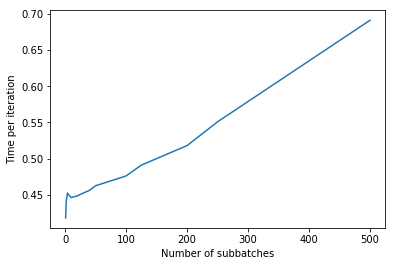

In [4]:
plt.plot(grid, times)
plt.xlabel('Number of subbatches')
plt.ylabel('Time per iteration')
plt.show()